In [1]:
import mujoco
import mujoco.rollout as rollout
from mujoco import sysid
import numpy as np
import matplotlib.pyplot as plt
import mediapy as media
from absl import logging
import base64
from IPython.display import IFrame

logging.set_verbosity("INFO")

def display_report(report):
    html_b64 = base64.b64encode(report.build().encode()).decode()
    return IFrame(src=f"data:text/html;base64,{html_b64}", width="100%", height=800)

In [160]:
H1_2_XML_TEXT = """\n 
    <mujoco model="h1_2">
  <compiler angle="radian" meshdir="meshes/" autolimits="true"/>

  <visual>
    <global offwidth="1920" offheight="1440"/>
    <rgba haze="0.7 0.78 0.88 1"/>
  </visual>

  <default>
    <joint damping="1" armature="0.19"  frictionloss="0.2" />
  </default>

  <asset>
    <texture type="skybox" builtin="gradient" rgb1="0.85 0.88 0.94" rgb2="0.6 0.65 0.78" width="512" height="512"/>
    <mesh name="pelvis" file="pelvis.STL"/>
    <mesh name="left_hip_yaw_link" file="left_hip_yaw_link.STL"/>
    <mesh name="left_hip_pitch_link" file="left_hip_pitch_link.STL"/>
    <mesh name="left_hip_roll_link" file="left_hip_roll_link.STL"/>
    <mesh name="left_knee_link" file="left_knee_link.STL"/>
    <mesh name="left_ankle_pitch_link" file="left_ankle_pitch_link.STL"/>
    <mesh name="left_ankle_roll_link" file="left_ankle_roll_link.STL"/>
    <mesh name="right_hip_yaw_link" file="right_hip_yaw_link.STL"/>
    <mesh name="right_hip_pitch_link" file="right_hip_pitch_link.STL"/>
    <mesh name="right_hip_roll_link" file="right_hip_roll_link.STL"/>
    <mesh name="right_knee_link" file="right_knee_link.STL"/>
    <mesh name="right_ankle_pitch_link" file="right_ankle_pitch_link.STL"/>
    <mesh name="right_ankle_roll_link" file="right_ankle_roll_link.STL"/>
    <mesh name="torso_link" file="torso_link.STL"/>
    <mesh name="left_shoulder_pitch_link" file="left_shoulder_pitch_link.STL"/>
    <mesh name="left_shoulder_roll_link" file="left_shoulder_roll_link.STL"/>
    <mesh name="left_shoulder_yaw_link" file="left_shoulder_yaw_link.STL"/>
    <mesh name="left_elbow_link" file="left_elbow_link.STL"/>
    <mesh name="left_wrist_roll_link" file="left_wrist_roll_link.STL"/>
    <mesh name="left_wrist_pitch_link" file="left_wrist_pitch_link.STL"/>
    <mesh name="wrist_yaw_link" file="wrist_yaw_link.STL"/>
    <mesh name="right_shoulder_pitch_link" file="right_shoulder_pitch_link.STL"/>
    <mesh name="right_shoulder_roll_link" file="right_shoulder_roll_link.STL"/>
    <mesh name="right_shoulder_yaw_link" file="right_shoulder_yaw_link.STL"/>
    <mesh name="right_elbow_link" file="right_elbow_link.STL"/>
    <mesh name="right_wrist_roll_link" file="right_wrist_roll_link.STL"/>
    <mesh name="right_wrist_pitch_link" file="right_wrist_pitch_link.STL"/>
    <mesh name="logo_link" file="logo_link.STL"/>
  </asset>

  <worldbody>
    <geom name="ground" type="plane" size="5 5 0.1" pos="0 0 0" rgba="0.25 0.45 0.85 1"/>
    <light name="sun" pos="0 0 3" dir="0 0 -1" diffuse="1 1 1" specular="0.5 0.5 0.5" directional="true"/>
    <!-- Head-on: camera in front of robot, tracks COM so robot stays in view -->
    <camera name="head_on" pos="3 0 1.3" xyaxes="0 1 0 0 0 1" fovy="45" mode="trackcom"/>
    <!-- Behind: camera behind robot ( -X ) looking toward +X at scene center -->
    <camera name="behind" pos="-3 0 1.3" xyaxes="0 -1 0 0 0 1"/>
    <!-- Right: camera on right side ( -Y ) looking at scene center -->
    <camera name="right" pos="0 -3 1.3" xyaxes="1 0 0 0 0 1"/>
    <!-- Left: camera on left side ( +Y ) looking at scene center -->
    <camera name="left" pos="0 3 1.3" xyaxes="-1 0 0 0 0 1"/>
    <body name="rope_pivot" pos="0 0 1.78">
      <joint name="rope_ball" type="ball"/>
      <geom name="rope" type="cylinder" size="0.015 0.25" pos="0 0 -0.25" rgba="0.35 0.3 0.25 1"/>
      <body name="pelvis" pos="0 0 -0.5">
      <inertial pos="-0.0004 3.7e-05 -0.046864" quat="0.497097 0.496809 -0.503132 0.502925" mass="5.983" diaginertia="0.0531565 0.0491678 0.00902583"/>
      <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="pelvis"/>
      <geom size="0.05" rgba="0.1 0.1 0.1 1"/>
      <body name="left_hip_yaw_link" pos="0 0.0875 -0.1632">
        <inertial pos="0 -0.026197 0.006647" quat="0.704899 -0.0553755 0.0548434 0.705013" mass="2.829" diaginertia="0.00574303 0.00455361 0.00349461"/>
        <joint name="left_hip_yaw_joint" pos="0 0 0" axis="0 0 1" range="-0.43 0.43" actuatorfrcrange="-200 200"/>
        <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_hip_yaw_link"/>
        <body name="left_hip_pitch_link" pos="0 0.0755 0">
          <inertial pos="-0.00781 -0.004724 -6.3e-05" quat="0.701575 0.711394 0.0330266 0.0249149" mass="2.92" diaginertia="0.00560661 0.00445055 0.00385068"/>
          <joint name="left_hip_pitch_joint" pos="0 0 0" axis="0 1 0" range="-3.14 2.5" actuatorfrcrange="-200 200"/>
          <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_hip_pitch_link"/>
          <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_hip_pitch_link"/>
          <body name="left_hip_roll_link">
            <inertial pos="0.004171 -0.008576 -0.194509" quat="0.634842 0.0146079 0.0074063 0.772469" mass="4.962" diaginertia="0.0480229 0.0462788 0.00887409"/>
            <joint name="left_hip_roll_joint" pos="0 0 0" axis="1 0 0" range="-0.43 3.14" actuatorfrcrange="-200 200"/>
            <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_hip_roll_link"/>
            <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_hip_roll_link"/>
            <body name="left_knee_link" pos="0 0 -0.4">
              <inertial pos="0.000179 0.000121 -0.168936" quat="0.416585 0.0104983 0.00514003 0.909021" mass="3.839" diaginertia="0.0391044 0.038959 0.00501125"/>
              <joint name="left_knee_joint" pos="0 0 0" axis="0 1 0" range="-0.12 2.19" actuatorfrcrange="-300 300"/>
              <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_knee_link"/>
              <geom size="0.04 0.1" pos="0 0 -0.2" type="cylinder" rgba="0.1 0.1 0.1 1"/>
              <body name="left_ankle_pitch_link" pos="0 0 -0.4">
                <inertial pos="-0.000294 0 -0.010794" quat="0.999984 0 -0.00574445 0" mass="0.102" diaginertia="2.39454e-05 2.1837e-05 1.34126e-05"/>
                <joint name="left_ankle_pitch_joint" pos="0 0 0" axis="0 1 0" range="-0.897334 0.523598" actuatorfrcrange="-60 60"/>
                <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_ankle_pitch_link"/>
                <body name="left_ankle_roll_link" pos="0 0 -0.02">
                  <inertial pos="0.029589 0 -0.015973" quat="0 0.725858 0 0.687845" mass="0.747" diaginertia="0.00359178 0.00343534 0.000640307"/>
                  <joint name="left_ankle_roll_joint" pos="0 0 0" axis="1 0 0" range="-0.261799 0.261799" actuatorfrcrange="-40 40"/>
                  <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_ankle_roll_link"/>
                  <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_ankle_roll_link"/>
                </body>
              </body>
            </body>
          </body>
        </body>
      </body>
      <body name="right_hip_yaw_link" pos="0 -0.0875 -0.1632">
        <inertial pos="0 0.026197 0.006647" quat="0.705013 0.0548434 -0.0553755 0.704899" mass="2.829" diaginertia="0.00574303 0.00455361 0.00349461"/>
        <joint name="right_hip_yaw_joint" pos="0 0 0" axis="0 0 1" range="-0.43 0.43" actuatorfrcrange="-200 200"/>
        <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_hip_yaw_link"/>
        <body name="right_hip_pitch_link" pos="0 -0.0755 0">
          <inertial pos="-0.00781 0.004724 -6.3e-05" quat="0.711394 0.701575 -0.0249149 -0.0330266" mass="2.92" diaginertia="0.00560661 0.00445055 0.00385068"/>
          <joint name="right_hip_pitch_joint" pos="0 0 0" axis="0 1 0" range="-3.14 2.5" actuatorfrcrange="-200 200"/>
          <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_hip_pitch_link"/>
          <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_hip_pitch_link"/>
          <body name="right_hip_roll_link">
            <inertial pos="0.004171 0.008576 -0.194509" quat="0.772469 0.0074063 0.0146079 0.634842" mass="4.962" diaginertia="0.0480229 0.0462788 0.00887409"/>
            <joint name="right_hip_roll_joint" pos="0 0 0" axis="1 0 0" range="-3.14 0.43" actuatorfrcrange="-200 200"/>
            <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_hip_roll_link"/>
            <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_hip_roll_link"/>
            <body name="right_knee_link" pos="0 0 -0.4">
              <inertial pos="0.000179 -0.000121 -0.168936" quat="0.909021 0.00514003 0.0104983 0.416585" mass="3.839" diaginertia="0.0391044 0.038959 0.00501125"/>
              <joint name="right_knee_joint" pos="0 0 0" axis="0 1 0" range="-0.12 2.19" actuatorfrcrange="-300 300"/>
              <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_knee_link"/>
              <geom size="0.04 0.1" pos="0 0 -0.2" type="cylinder" rgba="0.1 0.1 0.1 1"/>
              <body name="right_ankle_pitch_link" pos="0 0 -0.4">
                <inertial pos="-0.000294 0 -0.010794" quat="0.999984 0 -0.00574445 0" mass="0.102" diaginertia="2.39454e-05 2.1837e-05 1.34126e-05"/>
                <joint name="right_ankle_pitch_joint" pos="0 0 0" axis="0 1 0" range="-0.897334 0.523598" actuatorfrcrange="-60 60"/>
                <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_ankle_pitch_link"/>
                <body name="right_ankle_roll_link" pos="0 0 -0.02">
                  <inertial pos="0.029589 0 -0.015973" quat="0 0.725858 0 0.687845" mass="0.747" diaginertia="0.00359178 0.00343534 0.000640307"/>
                  <joint name="right_ankle_roll_joint" pos="0 0 0" axis="1 0 0" range="-0.261799 0.261799" actuatorfrcrange="-40 40"/>
                  <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_ankle_roll_link"/>
                  <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_ankle_roll_link"/>
                </body>
              </body>
            </body>
          </body>
        </body>
      </body>
      <body name="torso_link">
        <inertial pos="0.000489 0.002797 0.20484" quat="0.999989 -0.00130808 -0.00282289 -0.00349105" mass="17.789" diaginertia="0.487315 0.409628 0.127837"/>
        <joint name="torso_joint" pos="0 0 0" axis="0 0 1" range="-2.35 2.35" actuatorfrcrange="-200 200"/>
        <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="torso_link"/>
        <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="torso_link"/>
        <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="1 1 1 1" mesh="logo_link"/>
        <site name="imu" size="0.01" pos="-0.04452 -0.01891 0.27756"/>
        <body name="left_shoulder_pitch_link" pos="0 0.14806 0.42333" quat="0.991445 0.130526 0 0">
          <inertial pos="0.003053 0.06042 -0.0059" quat="0.761799 0.645681 -0.0378496 -0.0363943" mass="1.327" diaginertia="0.000588757 0.00053309 0.000393023"/>
          <joint name="left_shoulder_pitch_joint" pos="0 0 0" axis="0 1 0" range="-3.14 1.57" actuatorfrcrange="-40 40"/>
          <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_pitch_link"/>
          <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_pitch_link"/>
          <body name="left_shoulder_roll_link" pos="0.0342 0.061999 -0.0060011" quat="0.991445 -0.130526 0 0">
            <inertial pos="-0.030932 -1e-06 -0.10609" quat="0.986055 0.000456937 0.166408 0.00213553" mass="1.393" diaginertia="0.00200869 0.00193464 0.000449847"/>
            <joint name="left_shoulder_roll_joint" pos="0 0 0" axis="1 0 0" range="-0.38 3.4" actuatorfrcrange="-40 40"/>
            <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_roll_link"/>
            <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_roll_link"/>
            <body name="left_shoulder_yaw_link" pos="-0.0342 0 -0.1456">
              <inertial pos="0.004583 0.001128 -0.001128" quat="0.663644 -0.0108866 -0.0267235 0.747492" mass="1.505" diaginertia="0.00431782 0.00420697 0.000645658"/>
              <joint name="left_shoulder_yaw_joint" pos="0 0 0" axis="0 0 1" range="-2.66 3.01" actuatorfrcrange="-18 18"/>
              <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_yaw_link"/>
              <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_yaw_link"/>
              <body name="left_elbow_link" pos="0.006 0.0329 -0.182">
                <inertial pos="0.077092 -0.028751 -0.009714" quat="0.544921 0.610781 0.423352 0.388305" mass="0.691" diaginertia="0.000942091 0.000905273 0.00023025"/>
                <joint name="left_elbow_joint" pos="0 0 0" axis="0 1 0" range="-0.95 3.18" actuatorfrcrange="-18 18"/>
                <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_elbow_link"/>
                <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_elbow_link"/>
                <body name="left_wrist_roll_link" pos="0.121 -0.0329 -0.011">
                  <inertial pos="0.035281 -0.00232 0.000337" quat="0.334998 0.622198 -0.240131 0.66557" mass="0.683" diaginertia="0.00034681 0.000328248 0.000294628"/>
                  <joint name="left_wrist_roll_joint" pos="0 0 0" axis="1 0 0" range="-3.01 2.75" actuatorfrcrange="-19 19"/>
                  <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_wrist_roll_link"/>
                  <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_wrist_roll_link"/>
                  <body name="left_wrist_pitch_link" pos="0.087 0 0">
                    <inertial pos="0.020395 3.6e-05 -0.002973" quat="0.915893 -0.228405 -0.327262 -0.0432527" mass="0.484" diaginertia="7.25675e-05 7.00325e-05 6.9381e-05"/>
                    <joint name="left_wrist_pitch_joint" pos="0 0 0" axis="0 1 0" range="-0.4625 0.4625" actuatorfrcrange="-19 19"/>
                    <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_wrist_pitch_link"/>
                    <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_wrist_pitch_link"/>
                    <body name="left_wrist_yaw_link" pos="0.02 0 0">
                      <inertial pos="0.027967 9.6e-05 0.000739" quat="0.704961 -0.0198461 -0.019614 0.708697" mass="0.124" diaginertia="0.000169999 0.000137463 8.46436e-05"/>
                      <joint name="left_wrist_yaw_joint" pos="0 0 0" axis="0 0 1" range="-1.27 1.27" actuatorfrcrange="-19 19"/>
                      <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="wrist_yaw_link"/>
                    </body>
                  </body>
                </body>
              </body>
            </body>
          </body>
        </body>
        <body name="right_shoulder_pitch_link" pos="0 -0.14806 0.42333" quat="0.991445 -0.130526 0 0">
          <inertial pos="0.003053 -0.06042 -0.0059" quat="0.645681 0.761799 0.0363943 0.0378496" mass="1.327" diaginertia="0.000588757 0.00053309 0.000393023"/>
          <joint name="right_shoulder_pitch_joint" pos="0 0 0" axis="0 1 0" range="-3.14 1.57" actuatorfrcrange="-40 40"/>
          <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_pitch_link"/>
          <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_pitch_link"/>
          <body name="right_shoulder_roll_link" pos="0.0342 -0.061999 -0.0060011" quat="0.991445 0.130526 0 0">
            <inertial pos="-0.030932 1e-06 -0.10609" quat="0.986055 -0.000456937 0.166408 -0.00213553" mass="1.393" diaginertia="0.00200869 0.00193464 0.000449847"/>
            <joint name="right_shoulder_roll_joint" pos="0 0 0" axis="1 0 0" range="-3.4 0.38" actuatorfrcrange="-40 40"/>
            <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_roll_link"/>
            <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_roll_link"/>
            <body name="right_shoulder_yaw_link" pos="-0.0342 0 -0.1456">
              <inertial pos="0.004583 -0.001128 -0.001128" quat="0.747492 -0.0267235 -0.0108866 0.663644" mass="1.505" diaginertia="0.00431782 0.00420697 0.000645658"/>
              <joint name="right_shoulder_yaw_joint" pos="0 0 0" axis="0 0 1" range="-3.01 2.66" actuatorfrcrange="-18 18"/>
              <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_yaw_link"/>
              <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_yaw_link"/>
              <body name="right_elbow_link" pos="0.006 -0.0329 -0.182">
                <inertial pos="0.077092 0.028751 -0.009714" quat="0.388305 0.423352 0.610781 0.544921" mass="0.691" diaginertia="0.000942091 0.000905273 0.00023025"/>
                <joint name="right_elbow_joint" pos="0 0 0" axis="0 1 0" range="-0.95 3.18" actuatorfrcrange="-18 18"/>
                <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_elbow_link"/>
                <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_elbow_link"/>
                <body name="right_wrist_roll_link" pos="0.121 0.0329 -0.011">
                  <inertial pos="0.035281 -0.00232 0.000337" quat="0.334998 0.622198 -0.240131 0.66557" mass="0.683" diaginertia="0.00034681 0.000328248 0.000294628"/>
                  <joint name="right_wrist_roll_joint" pos="0 0 0" axis="1 0 0" range="-2.75 3.01" actuatorfrcrange="-19 19"/>
                  <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_wrist_roll_link"/>
                  <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_wrist_roll_link"/>
                  <body name="right_wrist_pitch_link" pos="0.087 0 0">
                    <inertial pos="0.020395 3.6e-05 -0.002973" quat="0.915893 -0.228405 -0.327262 -0.0432527" mass="0.484" diaginertia="7.25675e-05 7.00325e-05 6.9381e-05"/>
                    <joint name="right_wrist_pitch_joint" pos="0 0 0" axis="0 1 0" range="-0.4625 0.4625" actuatorfrcrange="-19 19"/>
                    <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_wrist_pitch_link"/>
                    <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_wrist_pitch_link"/>
                    <body name="right_wrist_yaw_link" pos="0.02 0 0">
                      <inertial pos="0.027967 -9.6e-05 0.000739" quat="0.708697 -0.019614 -0.0198461 0.704961" mass="0.124" diaginertia="0.000169999 0.000137463 8.46436e-05"/>
                      <joint name="right_wrist_yaw_joint" pos="0 0 0" axis="0 0 1" range="-1.27 1.27" actuatorfrcrange="-19 19"/>
                      <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="wrist_yaw_link"/>
                    </body>
                  </body>
                </body>
              </body>
            </body>
          </body>
        </body>
      </body>
    </body>
    </body>
  </worldbody>

  <actuator>
    <motor name="left_hip_yaw_joint" joint="left_hip_yaw_joint" ctrlrange="-200 200"/>
    <motor name="left_hip_pitch_joint" joint="left_hip_pitch_joint" ctrlrange="-200 200"/>
    <motor name="left_hip_roll_joint" joint="left_hip_roll_joint" ctrlrange="-200 200"/>
    <motor name="left_knee_joint" joint="left_knee_joint" ctrlrange="-300 300"/>
    <motor name="left_ankle_pitch_joint" joint="left_ankle_pitch_joint" ctrlrange="-60 60"/>
    <motor name="left_ankle_roll_joint" joint="left_ankle_roll_joint" ctrlrange="-40 40"/>
    <motor name="right_hip_yaw_joint" joint="right_hip_yaw_joint" ctrlrange="-200 200"/>
    <motor name="right_hip_pitch_joint" joint="right_hip_pitch_joint" ctrlrange="-200 200"/>
    <motor name="right_hip_roll_joint" joint="right_hip_roll_joint" ctrlrange="-200 200"/>
    <motor name="right_knee_joint" joint="right_knee_joint" ctrlrange="-300 300"/>
    <motor name="right_ankle_pitch_joint" joint="right_ankle_pitch_joint" ctrlrange="-60 60"/>
    <motor name="right_ankle_roll_joint" joint="right_ankle_roll_joint" ctrlrange="-40 40"/>
    <motor name="torso_joint" joint="torso_joint" ctrlrange="-200 200"/>
    <motor name="left_shoulder_pitch_joint" joint="left_shoulder_pitch_joint" ctrlrange="-40 40"/>
    <motor name="left_shoulder_roll_joint" joint="left_shoulder_roll_joint" ctrlrange="-40 40"/>
    <motor name="left_shoulder_yaw_joint" joint="left_shoulder_yaw_joint" ctrlrange="-18 18"/>
    <motor name="left_elbow_joint" joint="left_elbow_joint" ctrlrange="-18 18"/>
    <motor name="left_wrist_roll_joint" joint="left_wrist_roll_joint" ctrlrange="-19 19"/>
    <motor name="left_wrist_pitch_joint" joint="left_wrist_pitch_joint" ctrlrange="-19 19"/>
    <motor name="left_wrist_yaw_joint" joint="left_wrist_yaw_joint" ctrlrange="-19 19"/>
    <motor name="right_shoulder_pitch_joint" joint="right_shoulder_pitch_joint" ctrlrange="-40 40"/>
    <motor name="right_shoulder_roll_joint" joint="right_shoulder_roll_joint" ctrlrange="-40 40"/>
    <motor name="right_shoulder_yaw_joint" joint="right_shoulder_yaw_joint" ctrlrange="-18 18"/>
    <motor name="right_elbow_joint" joint="right_elbow_joint" ctrlrange="-18 18"/>
    <motor name="right_wrist_roll_joint" joint="right_wrist_roll_joint" ctrlrange="-19 19"/>
    <motor name="right_wrist_pitch_joint" joint="right_wrist_pitch_joint" ctrlrange="-19 19"/>
    <motor name="right_wrist_yaw_joint" joint="right_wrist_yaw_joint" ctrlrange="-19 19"/>
  </actuator>

  <sensor>
    <jointpos name="left_hip_yaw_pos" joint="left_hip_yaw_joint" />
    <jointpos name="left_hip_pitch_pos" joint="left_hip_pitch_joint" />
    <jointpos name="left_hip_roll_pos" joint="left_hip_roll_joint" />
    <jointpos name="left_knee_pos" joint="left_knee_joint" />
    <jointpos name="left_ankle_pitch_pos" joint="left_ankle_pitch_joint" />
    <jointpos name="left_ankle_roll_pos" joint="left_ankle_roll_joint" />
    <jointpos name="right_hip_yaw_pos" joint="right_hip_yaw_joint" />
    <jointpos name="right_hip_pitch_pos" joint="right_hip_pitch_joint" />
    <jointpos name="right_hip_roll_pos" joint="right_hip_roll_joint" />
    <jointpos name="right_knee_pos" joint="right_knee_joint" />
    <jointpos name="right_ankle_pitch_pos" joint="right_ankle_pitch_joint" />
    <jointpos name="right_ankle_roll_pos" joint="right_ankle_roll_joint" />
    <jointpos name="torso_joint_pos" joint="torso_joint" />
    <jointpos name="left_shoulder_pitch_pos" joint="left_shoulder_pitch_joint" />
    <jointpos name="left_shoulder_roll_pos" joint="left_shoulder_roll_joint" />
    <jointpos name="left_shoulder_yaw_pos" joint="left_shoulder_yaw_joint" />
    <jointpos name="left_elbow_pos" joint="left_elbow_joint" />
    <jointpos name="left_wrist_roll_pos" joint="left_wrist_roll_joint" />
    <jointpos name="left_wrist_pitch_pos" joint="left_wrist_pitch_joint" />
    <jointpos name="left_wrist_yaw_pos" joint="left_wrist_yaw_joint" />
    <jointpos name="right_shoulder_pitch_pos" joint="right_shoulder_pitch_joint" />
    <jointpos name="right_shoulder_roll_pos" joint="right_shoulder_roll_joint" />
    <jointpos name="right_shoulder_yaw_pos" joint="right_shoulder_yaw_joint" />
    <jointpos name="right_elbow_pos" joint="right_elbow_joint" />
    <jointpos name="right_wrist_roll_pos" joint="right_wrist_roll_joint" />
    <jointpos name="right_wrist_pitch_pos" joint="right_wrist_pitch_joint" />
    <jointpos name="right_wrist_yaw_pos" joint="right_wrist_yaw_joint" />

    <jointvel name="left_hip_yaw_vel" joint="left_hip_yaw_joint" />
    <jointvel name="left_hip_pitch_vel" joint="left_hip_pitch_joint" />
    <jointvel name="left_hip_roll_vel" joint="left_hip_roll_joint" />
    <jointvel name="left_knee_vel" joint="left_knee_joint" />
    <jointvel name="left_ankle_pitch_vel" joint="left_ankle_pitch_joint" />
    <jointvel name="left_ankle_roll_vel" joint="left_ankle_roll_joint" />
    <jointvel name="right_hip_yaw_vel" joint="right_hip_yaw_joint" />
    <jointvel name="right_hip_pitch_vel" joint="right_hip_pitch_joint" />
    <jointvel name="right_hip_roll_vel" joint="right_hip_roll_joint" />
    <jointvel name="right_knee_vel" joint="right_knee_joint" />
    <jointvel name="right_ankle_pitch_vel" joint="right_ankle_pitch_joint" />
    <jointvel name="right_ankle_roll_vel" joint="right_ankle_roll_joint" />
    <jointvel name="torso_joint_vel" joint="torso_joint" />
    <jointvel name="left_shoulder_pitch_vel" joint="left_shoulder_pitch_joint" />
    <jointvel name="left_shoulder_roll_vel" joint="left_shoulder_roll_joint" />
    <jointvel name="left_shoulder_yaw_vel" joint="left_shoulder_yaw_joint" />
    <jointvel name="left_elbow_vel" joint="left_elbow_joint" />
    <jointvel name="left_wrist_roll_vel" joint="left_wrist_roll_joint" />
    <jointvel name="left_wrist_pitch_vel" joint="left_wrist_pitch_joint" />
    <jointvel name="left_wrist_yaw_vel" joint="left_wrist_yaw_joint" />
    <jointvel name="right_shoulder_pitch_vel" joint="right_shoulder_pitch_joint" />
    <jointvel name="right_shoulder_roll_vel" joint="right_shoulder_roll_joint" />
    <jointvel name="right_shoulder_yaw_vel" joint="right_shoulder_yaw_joint" />
    <jointvel name="right_elbow_vel" joint="right_elbow_joint" />
    <jointvel name="right_wrist_roll_vel" joint="right_wrist_roll_joint" />
    <jointvel name="right_wrist_pitch_vel" joint="right_wrist_pitch_joint" />
    <jointvel name="right_wrist_yaw_vel" joint="right_wrist_yaw_joint" />

    <jointactuatorfrc name="left_hip_yaw_torque" joint="left_hip_yaw_joint" />
    <jointactuatorfrc name="left_hip_pitch_torque" joint="left_hip_pitch_joint" />
    <jointactuatorfrc name="left_hip_roll_torque" joint="left_hip_roll_joint" />
    <jointactuatorfrc name="left_knee_torque" joint="left_knee_joint" />
    <jointactuatorfrc name="left_ankle_pitch_torque" joint="left_ankle_pitch_joint" />
    <jointactuatorfrc name="left_ankle_roll_torque" joint="left_ankle_roll_joint" />
    <jointactuatorfrc name="right_hip_pitch_torque" joint="right_hip_pitch_joint" />
    <jointactuatorfrc name="right_hip_roll_torque" joint="right_hip_roll_joint" />
    <jointactuatorfrc name="right_hip_yaw_torque" joint="right_hip_yaw_joint" />
    <jointactuatorfrc name="right_knee_torque" joint="right_knee_joint" />
    <jointactuatorfrc name="right_ankle_pitch_torque" joint="right_ankle_pitch_joint" />
    <jointactuatorfrc name="right_ankle_roll_torque" joint="right_ankle_roll_joint" />
    <jointactuatorfrc name="torso_joint_torque" joint="torso_joint" />
    <jointactuatorfrc name="left_shoulder_yaw_torque" joint="left_shoulder_yaw_joint" />
    <jointactuatorfrc name="left_shoulder_pitch_torque" joint="left_shoulder_pitch_joint" />
    <jointactuatorfrc name="left_shoulder_roll_torque" joint="left_shoulder_roll_joint" />
    <jointactuatorfrc name="left_elbow_torque" joint="left_elbow_joint" />
    <jointactuatorfrc name="left_wrist_roll_torque" joint="left_wrist_roll_joint" />
    <jointactuatorfrc name="left_wrist_pitch_torque" joint="left_wrist_pitch_joint" />
    <jointactuatorfrc name="left_wrist_yaw_torque" joint="left_wrist_yaw_joint" />
    <jointactuatorfrc name="right_shoulder_pitch_torque" joint="right_shoulder_pitch_joint" />
    <jointactuatorfrc name="right_shoulder_roll_torque" joint="right_shoulder_roll_joint" />
    <jointactuatorfrc name="right_shoulder_yaw_torque" joint="right_shoulder_yaw_joint" />
    <jointactuatorfrc name="right_elbow_torque" joint="right_elbow_joint" />
    <jointactuatorfrc name="right_wrist_roll_torque" joint="right_wrist_roll_joint" />
    <jointactuatorfrc name="right_wrist_pitch_torque" joint="right_wrist_pitch_joint" />
    <jointactuatorfrc name="right_wrist_yaw_torque" joint="right_wrist_yaw_joint" />

    <framequat name="imu_quat" objtype="site" objname="imu" />
    <gyro name="imu_gyro" site="imu" />
    <accelerometer name="imu_acc" site="imu" />

    <framepos name="frame_pos" objtype="site" objname="imu" />
    <framelinvel name="frame_vel" objtype="site" objname="imu" />
  </sensor>
</mujoco>

"""

In [213]:
H1_2_XML = H1_2_XML_TEXT
spec = mujoco.MjSpec.from_string(H1_2_XML)
model = spec.compile()
data = mujoco.MjData(model)

# All actuator (joint) names in model order. Choose which to control below.
actuator_names = [model.actuator(i).name for i in range(model.nu)]
print("Available actuators:", actuator_names)

# --- Choose which joints to control (edit this list) ---
# Use a subset of names from actuator_names, or use actuator_names to control all.
joints_to_control = [
    #"left_hip_pitch_joint",
    #"left_hip_roll_joint",
    #"right_hip_pitch_joint",
    "left_knee_joint",
    #"right_knee_joint",
]  # Example: only legs. Set to actuator_names to control all 27.
controlled_mask = np.array([name in joints_to_control for name in actuator_names])
print("Controlling", controlled_mask.sum(), "actuators:", joints_to_control)

duration = 3.0
n_steps = int(duration / model.opt.timestep)
t = np.arange(n_steps) * model.opt.timestep

# Build per-actuator control: each controlled joint gets its own signal (different phase)
ctrl = np.zeros((n_steps, model.nu))
for i in range(model.nu):
    if controlled_mask[i]:
        # Slightly different frequency/phase per actuator so each moves independently
        phase = 5 * np.pi * (i / max(model.nu, 1))
        ctrl[:, i] = 13.0 * np.sin(1 * np.pi * 1.0 * t + phase) + 10.0 * np.sin(
            10 * np.pi * 2.5 * t + 0.7 * phase
        )
ctrl2 = np.zeros((n_steps, model.nu))
for i in range(model.nu):
    if controlled_mask[i]:
        # Slightly different frequency/phase per actuator so each moves independently
        phase = 5 * np.pi * (i / max(model.nu, 1))
        ctrl[:, i] = 15.0 * np.sin(1 * np.pi * 1.0 * t + phase) + 7.0 * np.sin(
            10 * np.pi * 2.5 * t + 0.7 * phase
        )
ctrl3 = np.zeros((n_steps, model.nu))
for i in range(model.nu):
    if controlled_mask[i]:
        # Slightly different frequency/phase per actuator so each moves independently
        phase = 5 * np.pi * (i / max(model.nu, 1))
        ctrl[:, i] = 20.0 * np.sin(1 * np.pi * 1.0 * t + phase) + 3.0 * np.sin(
            10 * np.pi * 2.5 * t + 0.7 * phase
        )

initial_state = sysid.create_initial_state(model, data.qpos, data.qvel, data.act)
# think about masking sensor data to relevant joints for control
state, sensor = rollout.rollout(model, data, initial_state, ctrl[:-1])
state = np.squeeze(state, axis=0)
sensor = np.squeeze(sensor, axis=0)
times = state[:, 0]

Available actuators: ['left_hip_yaw_joint', 'left_hip_pitch_joint', 'left_hip_roll_joint', 'left_knee_joint', 'left_ankle_pitch_joint', 'left_ankle_roll_joint', 'right_hip_yaw_joint', 'right_hip_pitch_joint', 'right_hip_roll_joint', 'right_knee_joint', 'right_ankle_pitch_joint', 'right_ankle_roll_joint', 'torso_joint', 'left_shoulder_pitch_joint', 'left_shoulder_roll_joint', 'left_shoulder_yaw_joint', 'left_elbow_joint', 'left_wrist_roll_joint', 'left_wrist_pitch_joint', 'left_wrist_yaw_joint', 'right_shoulder_pitch_joint', 'right_shoulder_roll_joint', 'right_shoulder_yaw_joint', 'right_elbow_joint', 'right_wrist_roll_joint', 'right_wrist_pitch_joint', 'right_wrist_yaw_joint']
Controlling 1 actuators: ['left_knee_joint']


In [214]:
#@title { vertical-output: true }

# Switch camera: "head_on" | "behind" | "right" | "left"
camera_angle = "head_on"  

# Render the rollout.
frames = sysid.render_rollout(
    model, data, state[None], framerate=30,
    camera=camera_angle, height=800, width=1120
)
media.show_video(frames, fps=30)


In [215]:
# Add realistic sensor noise
rng = np.random.default_rng(seed=0)
noise_std = np.zeros(sensor.shape[1])
noise_std[:] = 0.9  # position noise (rad)
sensor_noisy = sensor + rng.normal(scale=noise_std, size=sensor.shape)

control_ts = sysid.TimeSeries(t, ctrl)
control_ts2 = sysid.TimeSeries(t, ctrl2)
control_ts3 = sysid.TimeSeries(t, ctrl3)
sensor_ts = sysid.TimeSeries.from_names(times, sensor_noisy, model)

print(f"Sensor channels: {sensor.shape[1]}  "
      f"({model.nsensor} sensors: 5 pos + 5 vel)")
print(f"Timesteps: {len(times)} ({duration}s at dt={model.opt.timestep})")
print(f"Noise std: {noise_std[:5][0]:.0e} rad (pos)")

Sensor channels: 97  (86 sensors: 5 pos + 5 vel)
Timesteps: 1499 (3.0s at dt=0.002)
Noise std: 9e-01 rad (pos)


In [216]:
# Use the same joints selected for control (joints_to_control from earlier cell).
JOINT_NAMES = list(joints_to_control)
# True armature values read from the compiled model (matches XML).
TRUE_ARMATURE = {name: model.joint(name).armature for name in JOINT_NAMES}

INIT_ARMATURE = 0.05

def make_armature_modifier(joint_name):
    """Create a modifier that sets armature on a specific joint."""
    def modifier(spec, param):
        spec.joint(joint_name).armature = param.value[0]
    return modifier

params = sysid.ParameterDict()
for name in JOINT_NAMES:
    true_val = TRUE_ARMATURE[name]
    params.add(sysid.Parameter(
        f"{name}_armature",
        nominal=true_val,
        min_value=0.01,
        max_value=0.6,
        modifier=make_armature_modifier(name),
    ))
    # Start from wrong initial guess
    params[f"{name}_armature"].value[:] = INIT_ARMATURE

print("Initial parameter vector:", params.as_vector())
print("True values:             ",
      np.array([TRUE_ARMATURE[n] for n in JOINT_NAMES]))

# Also learn joint friction and damping alongside armature.

# True friction and damping values from the compiled model (match XML).
TRUE_FRICTION = {name: model.joint(name).frictionloss for name in JOINT_NAMES}
TRUE_DAMPING = {name: model.joint(name).damping for name in JOINT_NAMES}

# Initial guesses
INIT_FRICTION = 1.0
INIT_DAMPING = 4.8


def make_friction_modifier(joint_name):
    """Create a modifier that sets frictionloss on a specific joint."""
    def modifier(spec, param):
        spec.joint(joint_name).frictionloss = param.value[0]
    return modifier


def make_damping_modifier(joint_name):
    """Create a modifier that sets damping on a specific joint."""
    def modifier(spec, param):
        spec.joint(joint_name).damping = param.value[0]
    return modifier


# Extend the existing ParameterDict with friction and damping parameters.
for name in JOINT_NAMES:
    true_fric = TRUE_FRICTION[name]
    true_damp = TRUE_DAMPING[name]

    # Friction parameter
    params.add(
        sysid.Parameter(
            f"{name}_friction",
            nominal=true_fric,
            min_value=0.1,
            max_value=2.0,
            modifier=make_friction_modifier(name),
        )
    )
    params[f"{name}_friction"].value[:] = INIT_FRICTION

    # Damping parameter
    params.add(
        sysid.Parameter(
            f"{name}_damping",
            nominal=true_damp,
            min_value=0.2,
            max_value=5.0,
            modifier=make_damping_modifier(name),
        )
    )
    params[f"{name}_damping"].value[:] = INIT_DAMPING

print("Extended parameter vector (armature + friction + damping):", params.as_vector())
print("True friction values:", np.array([TRUE_FRICTION[n] for n in JOINT_NAMES]))
print("True damping values: ", np.array([TRUE_DAMPING[n] for n in JOINT_NAMES]))

Initial parameter vector: [0.05]
True values:              [[0.19]]
Extended parameter vector (armature + friction + damping): [0.05 1.   4.8 ]
True friction values: [[0.2]]
True damping values:  [[1.]]


In [217]:
# #@title { vertical-output: true}
# ms = sysid.ModelSequences(
#     "left_knee_joint", spec, "sinusoidal", initial_state, control_ts, sensor_ts,
# )
"""
This for multiple trajectories to tighten the fit
"""
ms1 = sysid.ModelSequences("left_knee_joint", spec, "traj_1", initial_state, control_ts, sensor_ts)
ms2 = sysid.ModelSequences("left_knee_joint", spec, "traj_2", initial_state, control_ts2, sensor_ts)
ms3 = sysid.ModelSequences("left_knee_joint", spec, "traj_3", initial_state, control_ts3, sensor_ts)

residual_fn = sysid.build_residual_fn(models_sequences=[ms1, ms2, ms3])

#residual_fn = sysid.build_residual_fn(models_sequences=[ms])

opt_params, opt_result = sysid.optimize(
    initial_params=params,
    residual_fn=residual_fn,
    optimizer="mujoco",
)

iter: 0    y: 275.4      log10mu: -inf  ratio: 1.4      dx: 3        reduction: 0.29   
iter: 1    y: 275.1      log10mu: -inf  ratio: 0.48     dx: 2.1      reduction: 0.06   
iter: 2    y: 275        log10mu: -inf  ratio: 1.2      dx: 0.069    reduction: 0.019  
iter: 3    y: 275        log10mu: -inf  ratio: 3.5      dx: 0.17     reduction: 0.056  
iter: 4    y: 275        log10mu: -inf  ratio: 0.49     dx: 0.062    reduction: 0.0074 
iter: 5    y: 274.9      log10mu: -inf  ratio: 0.99     dx: 0.017    reduction: 0.0013 
iter: 6    y: 274.9      log10mu: -inf  ratio: 3.5      dx: 0.16     reduction: 0.039  
iter: 7    y: 274.9      log10mu: -inf  ratio: 1.7      dx: 0.18     reduction: 0.038  
iter: 8    y: 274.9      log10mu: -0.1  ratio: 0.21     dx: 0.08     reduction: 0.005  
iter: 9    y: 274.9      log10mu:  0.3  ratio: 0.59     dx: 1.9e-05  reduction: 0.00011


INFO:absl:
+--------------------------+-----------+-----------+--------------+---------+---------+-----------+-----------+-----------+-----------+
| Parameter                | Initial   | Nominal   | Identified   | Lower   | Upper   | Abs Err   | Abs Del   | Rel Err   | Rel Del   |
+==========================+===========+===========+==============+=========+=========+===========+===========+===========+===========+
| left_knee_joint_armature |  0.0500   |  0.1900   |  0.2738      |  0.0100 |  0.6000 |  0.0838   |  0.2238   | 44.1%     | 447.6%    |
| left_knee_joint_friction |  1.0000   |  0.2000   |  0.1000      |  0.1000 |  2.0000 |  0.1000   |  0.9000   | 50.0%     | 90.0%     |
| left_knee_joint_damping  |  4.8000   |  1.0000   |  2.2890      |  0.2000 |  5.0000 |  1.2890   |  2.5110   | 128.9%    | 52.3%     |
+--------------------------+-----------+-----------+--------------+---------+---------+-----------+-----------+-----------+-----------+
RMSE: 0.748
RMS Delta: 1.545


Terminated after 10 iterations: insufficient reduction. y: 274.9, Residual evals: 188
total time 89.4s of which residual 99.6%


In [218]:
#@title { vertical-output: true }
# Switch camera: "head_on" | "behind" | "right" | "left"
camera_angle = "left"  # change to match your preferred view

def set_body_rgba(body, rgba):
    """Recursively set rgba on all geoms in a body tree."""
    for geom in body.geoms:
        geom.rgba = rgba
    for child in body.bodies:
        set_body_rgba(child, rgba)

def make_colored_model(base_spec, rgba, armature_values):
    """Copy spec, set geom colors and armature, compile."""
    s = base_spec.copy()
    for name, val in armature_values.items():
        s.joint(name).armature = val
    set_body_rgba(s.worldbody, rgba)
    return s.compile()

true_armature = {n: TRUE_ARMATURE[n] for n in JOINT_NAMES}
init_armature = {n: INIT_ARMATURE for n in JOINT_NAMES}
opt_armature = {n: opt_params[f"{n}_armature"].value[0] for n in JOINT_NAMES}

green = [0.2, 0.8, 0.2, 0.7]
red = [1.0, 0.2, 0.2, 0.7]
blue = [0.2, 0.4, 1.0, 0.7]

truth_model = make_colored_model(spec, green, true_armature)
init_model = make_colored_model(spec, red, init_armature)
opt_model = make_colored_model(spec, blue, opt_armature)

fps = 30

# Before: initial (red) vs ground truth (green)
models_before = [init_model, truth_model]
datas_before = [mujoco.MjData(m) for m in models_before]
state_before, _ = rollout.rollout(
    models_before, datas_before, initial_state, ctrl[:-1]
)
frames_before = sysid.render_rollout(
    models_before, datas_before[0], state_before,
    framerate=fps, camera=camera_angle, height=800, width=1120,
)

# After: optimized (blue) vs ground truth (green)
models_after = [opt_model, truth_model]
datas_after = [mujoco.MjData(m) for m in models_after]
state_after, _ = rollout.rollout(
    models_after, datas_after, initial_state, ctrl[:-1]
)
frames_after = sysid.render_rollout(
    models_after, datas_after[0], state_after,
    framerate=fps, camera=camera_angle, height=800, width=1120,
)

# Side by side
media.show_videos(
    [frames_before, frames_after],
    fps=fps,
    titles=["Before: initial (red) vs truth (green)",
            "After: optimized (blue) vs truth (green)"],
)

/var/folders/xc/ms6n_l7n3vvc9nz7f9fzm_nr0000gn/T/ipykernel_42665/1524379095.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



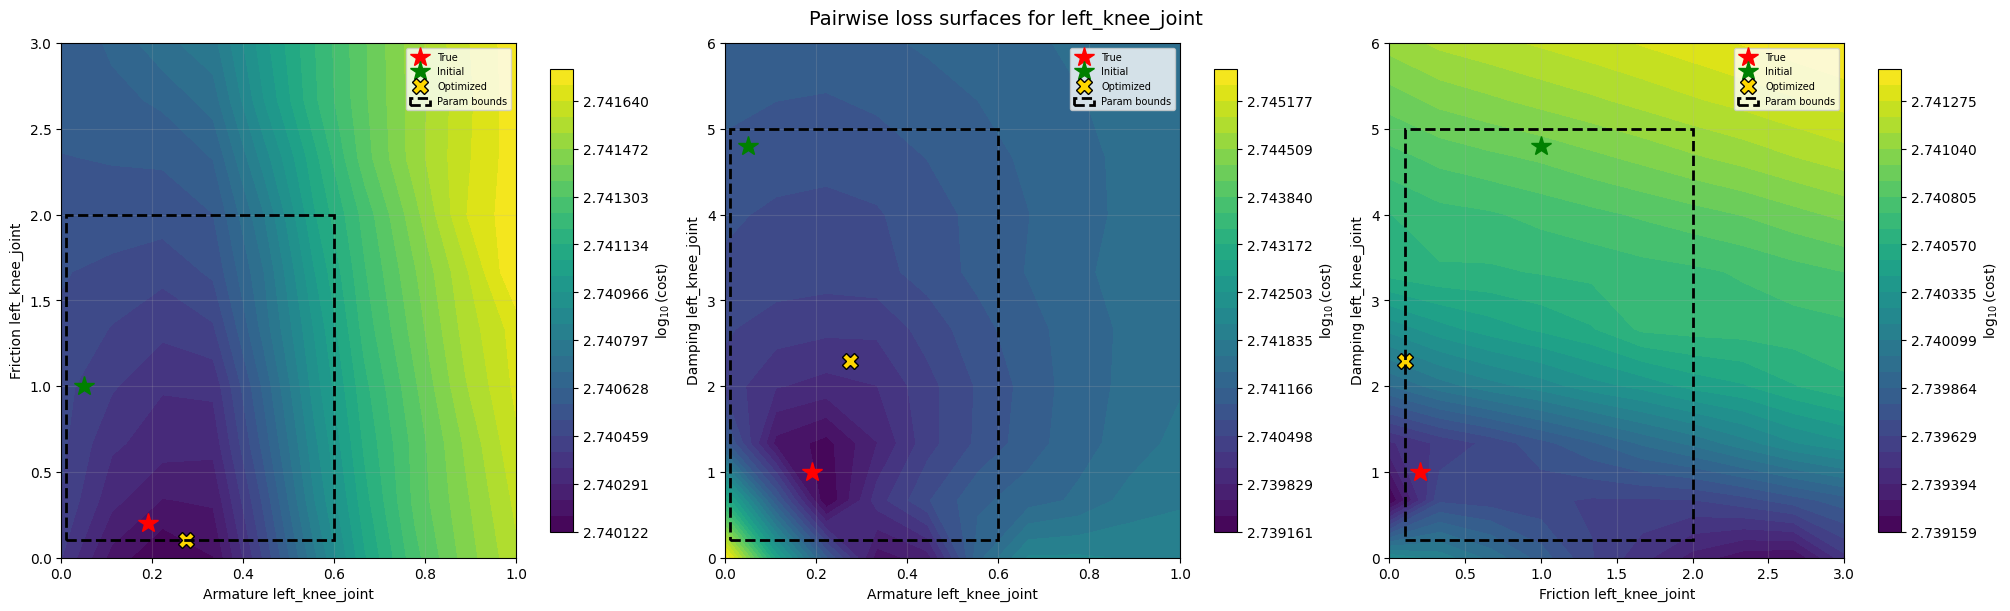

In [219]:
#@title Pairwise loss space contours (arm–fric, arm–damp, fric–damp) { vertical-output: true }
import matplotlib.patches as patches

joint_0 = JOINT_NAMES[0]
name_arm  = f"{joint_0}_armature"
name_fric = f"{joint_0}_friction"
name_damp = f"{joint_0}_damping"

# Wider grids (extend beyond the optimiser bounds)
armature_grid_wide = np.linspace(0.0, 1.0, 10)
friction_grid_wide = np.linspace(0.0, 3.0, 10)
damping_grid_wide  = np.linspace(0.0, 6.0, 10)

# Optimiser bounds (for the black boxes)
arm_lo, arm_hi   = 0.01, 0.6
fric_lo, fric_hi = 0.1,  2.0
damp_lo, damp_hi = 0.2,  5.0

def _eval_grid(residual_fn, params_template, key_x, grid_x, key_y, grid_y):
    cost = np.zeros((len(grid_x), len(grid_y)))
    p = params_template.copy()
    for i, vx in enumerate(grid_x):
        for j, vy in enumerate(grid_y):
            p[key_x].value[:] = vx
            p[key_y].value[:] = vy
            x = p.as_vector()
            res, _, _ = residual_fn(x, p)
            cost[i, j] = sum(np.sum(r**2) for r in res)
    return cost

# Compute three pairwise surfaces
cost_af = _eval_grid(residual_fn, opt_params, name_arm,  armature_grid_wide, name_fric, friction_grid_wide)
cost_ad = _eval_grid(residual_fn, opt_params, name_arm,  armature_grid_wide, name_damp, damping_grid_wide)
cost_fd = _eval_grid(residual_fn, opt_params, name_fric, friction_grid_wide, name_damp, damping_grid_wide)

true_a = TRUE_ARMATURE[joint_0]
true_f = TRUE_FRICTION[joint_0]
true_d = TRUE_DAMPING[joint_0]
init_a = INIT_ARMATURE
init_f = INIT_FRICTION
init_d = INIT_DAMPING
opt_a  = opt_params[name_arm].value[0]
opt_f  = opt_params[name_fric].value[0]
opt_d  = opt_params[name_damp].value[0]

panels = [
    (armature_grid_wide, friction_grid_wide, cost_af,
     f"Armature {joint_0}", f"Friction {joint_0}",
     true_a, true_f, init_a, init_f, opt_a, opt_f,
     arm_lo, arm_hi, fric_lo, fric_hi),
    (armature_grid_wide, damping_grid_wide,  cost_ad,
     f"Armature {joint_0}", f"Damping {joint_0}",
     true_a, true_d, init_a, init_d, opt_a, opt_d,
     arm_lo, arm_hi, damp_lo, damp_hi),
    (friction_grid_wide,  damping_grid_wide,  cost_fd,
     f"Friction {joint_0}", f"Damping {joint_0}",
     true_f, true_d, init_f, init_d, opt_f, opt_d,
     fric_lo, fric_hi, damp_lo, damp_hi),
]

fig, axes = plt.subplots(1, 3, figsize=(20, 6), layout="constrained")
for ax, (gx, gy, cost, xlabel, ylabel,
         tx, ty, ix, iy, ox, oy,
         bx_lo, bx_hi, by_lo, by_hi) in zip(axes, panels):
    X, Y = np.meshgrid(gx, gy)
    log_cost = np.log10(cost + 1e-12)
    levels = np.linspace(log_cost.min(), log_cost.max(), 30)
    cf = ax.contourf(X, Y, log_cost.T, levels=levels, cmap="viridis")

    ax.plot(tx, ty, "r*", markersize=15, label="True", zorder=5)
    ax.plot(ix, iy, "g*", markersize=15, label="Initial", zorder=5)
    ax.plot(ox, oy, marker="X", color="gold", markeredgecolor="k",
            markeredgewidth=1, markersize=12, linestyle="none",
            label="Optimized", zorder=5)

    rect = patches.Rectangle(
        (bx_lo, by_lo), bx_hi - bx_lo, by_hi - by_lo,
        linewidth=2, edgecolor="black", facecolor="none",
        linestyle="--", label="Param bounds", zorder=6,
    )
    ax.add_patch(rect)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.2)
    fig.colorbar(cf, ax=ax, label=r"$\log_{10}$(cost)", shrink=0.9)
    ax.legend(loc="best", fontsize=7)

fig.suptitle(f"Pairwise loss surfaces for {joint_0}", fontsize=14)
plt.show()